In [ ]:
# For mounting drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Reading cleaned dataset
import pandas as pd
path = '/content/drive/My Drive/BE PROJECT/Lawgical Final/LabelledDataset/'
df = pd.read_csv(path+'cleaned_dataset_new.csv')

In [ ]:
# Splitting the dataset into train and test sets
X = df.loc[:,'Judgement'].values
y = df.loc[:,'label'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [ ]:
# import pandas as pd
# path = '/content/drive/My Drive/BE PROJECT/Lawgical Final/LabelledDataset/'
# traindf = pd.read_csv(path+'train.csv')
# testdf = pd.read_csv(path+'test.csv')
# X_train = traindf.loc[:,'Judgement'].values
# y_train = traindf.loc[:,'label'].values
# X_test = testdf.loc[:,'Judgement'].values
# y_test = testdf.loc[:,'label'].values

In [ ]:
# Vectorizing the corpus using TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1,2),max_features=10000) 
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(1192, 10000) (512, 10000)


In [ ]:
! pip install -q scikit-plot

In [ ]:
from  sklearn.metrics  import accuracy_score
from  sklearn.metrics  import recall_score
from  sklearn.metrics  import precision_score
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

In [ ]:
# Scaling inputvectors using MaxAbsScaler

from sklearn.feature_selection import RFE
from sklearn import preprocessing

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_mabs= max_abs_scaler.fit_transform(train_vectors)
X_test_mabs= max_abs_scaler.transform(test_vectors)

In [ ]:
# Algorithm 1 : Naive Bayes (Multinomial and Complement)

Accuracy Score =  0.69140625
Recall Score =  0.7737704918032787
Precision Score =  0.7261538461538461
[[118  89]
 [ 69 236]]


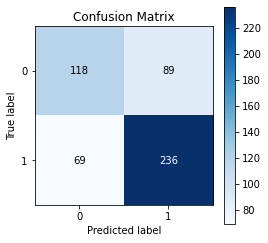

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=.0001)
clf.fit(train_vectors, y_train)

predicted = clf.predict(test_vectors)

print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
print(confusion_matrix(y_test, predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

Accuracy Score =  0.63671875
Recall Score =  0.9868852459016394
Precision Score =  0.6231884057971014


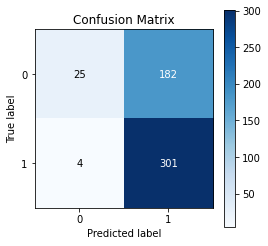

In [ ]:
from sklearn.naive_bayes import ComplementNB

cnb = ComplementNB(alpha=2, class_prior=[88,16])
cnb.fit(train_vectors, y_train)

predicted = cnb.predict(test_vectors)

print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

In [ ]:
# Algorithm 2 : K Neighbors Classifier

Accuracy Score =  0.626953125
Recall Score =  0.7704918032786885
Precision Score =  0.6601123595505618


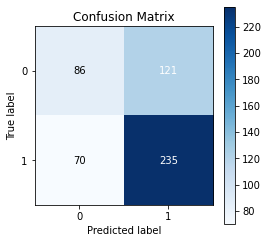

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=30, weights='distance')
knn.fit(train_vectors, y_train)

predicted = knn.predict(test_vectors)

print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

In [ ]:
# Algorithm 3 : SVM

Accuracy Score =  0.748046875
Recall Score =  0.7901639344262295
Precision Score =  0.7875816993464052


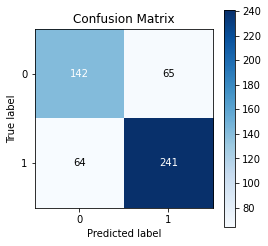

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC(C=3, max_iter=5000)
svm.fit(X_train_mabs, y_train)

predicted = svm.predict(X_test_mabs)

print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

In [ ]:
# Algorith 4 : Logistic Regression

Accuracy Score =  0.767578125
Recall Score =  0.8229508196721311
Precision Score =  0.7943037974683544


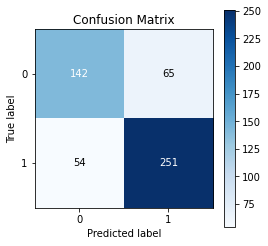

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', penalty='l1')
lr.fit(X_train_mabs, y_train)

predicted = lr.predict(X_test_mabs)

print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))

In [ ]:
# Algorithm 5 : Random Forest

Accuracy Score =  0.82421875
Recall Score =  0.9278688524590164
Precision Score =  0.8062678062678063


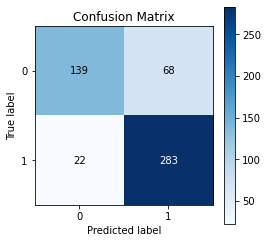

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfclf=RandomForestClassifier(random_state=52, bootstrap=False, max_features='auto', n_estimators=1000, class_weight='balanced')
rfclf.fit(train_vectors, y_train)

predicted=rfclf.predict(test_vectors)

print('Accuracy Score = ',accuracy_score(y_test,predicted))
print('Recall Score = ',recall_score(y_test,predicted))
print('Precision Score = ',precision_score(y_test,predicted))
skplt.metrics.plot_confusion_matrix(y_test, predicted, figsize=(4,4))